# Задание 1. Пункт 3
Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

In [145]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датасет

In [146]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

Преобразуем наши данные в новое пространство переменных

In [147]:
lda = LinearDiscriminantAnalysis()
transformed_x = lda.fit(x, y).transform(x)

А теперь применяем lda ещё раз, как и в предыдущем задании (тут можно и не только lda применять)

In [148]:
model = LinearDiscriminantAnalysis()
model.fit(transformed_x, y)

LinearDiscriminantAnalysis()

А теперь строим график

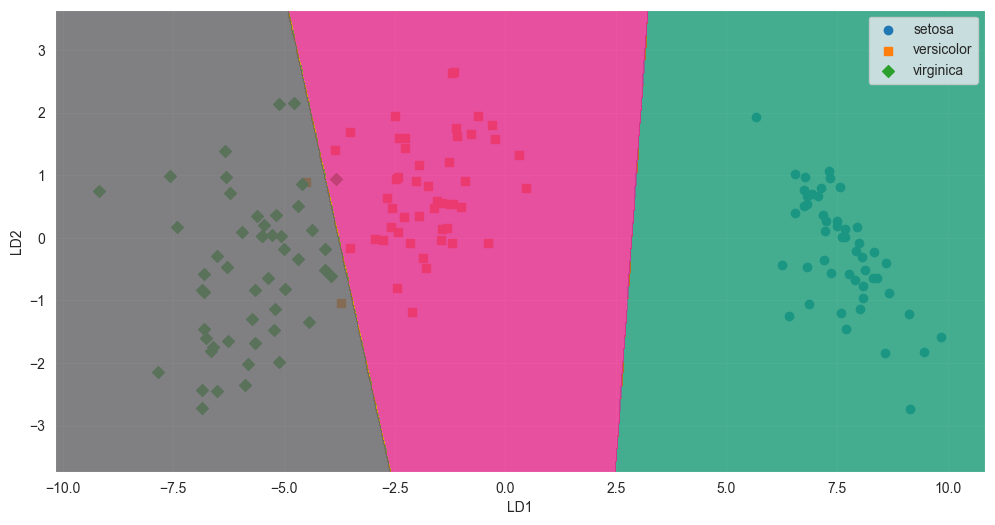

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x_min, x_max = transformed_x[:, 0].min() - 1, transformed_x[:, 0].max() + 1
y_min, y_max = transformed_x[:, 1].min() - 1, transformed_x[:, 1].max() + 1
    
mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

markers = ["o", "s", "D"]
# Эта штука нужна, чтобы разделить на маркеры нормально, а так всё как и в предыдущем задании
for i, target_name in enumerate(target_names):
    ax.scatter(transformed_x[y == i, 0], transformed_x[y == i, 1], label=target_name, marker=markers[i])

cmap_light = sns.color_palette("Dark2", n_colors=len(target_names), as_cmap=True)
ax.contourf(mesh_x, mesh_y, model.predict(np.array([mesh_x.ravel(), mesh_y.ravel()]).T).reshape(mesh_x.shape), alpha=0.8, cmap=cmap_light)

ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.legend()

plt.show()